In [1]:
%load_ext autoreload

In [13]:
%autoreload 2
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import daytradeai.data as data
import daytradeai.config as config
import daytradeai.preprocess as preprocess
import daytradeai.visualize as visualize
import daytradeai.util as util
import daytradeai.policies as policies
import daytradeai.evaluate as evaluate
import torch

# Policy

* We are trying to beat control over a period of T days.
* T will typically be 250 trading days, a year.
* Our model will pick one stock from the index per short term days, usually 1. 

## What are trying to Beat?
* Lets compare to a random picker - randomly pick one of the stocks in the index.

In [15]:
cfg = config.cfg
stocks = data.get_tickers(group=cfg['data']['stocks'])

p_cfg = cfg["preprocess"]
df_p = preprocess.load_preprocessd(cfg=p_cfg).dropna()
df_p = evaluate.add_index_performance(df=df_p, stocks=stocks, index_name=p_cfg['index_name'])

print(df_p.index.max(), len(df_p))

2025-01-30 10:13 - daytradeai.preprocess - INFO - Loading preprocessed data from /Users/davidschneider/data/daytradeai/prd/preprocessed/2025-01-29.parquet


2025-01-28 00:00:00 1018


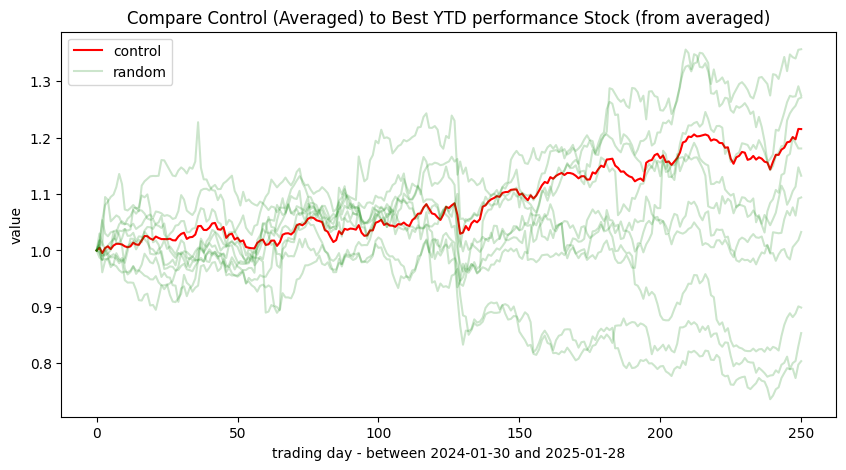

In [44]:
# evaluate over most recent year
visualize.control_random_daily(df=df_p, p_cfg=p_cfg, stocks=stocks, T=250)

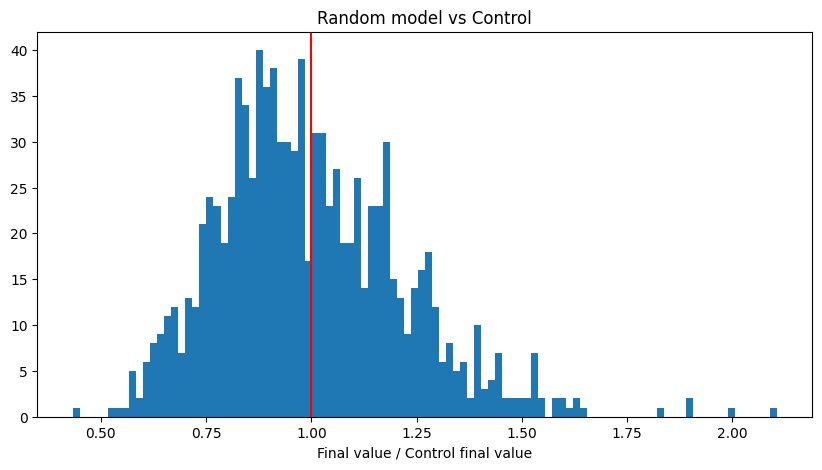

In [19]:
visualize.hist_random_vs_control(df=df_p, p_cfg=p_cfg, stocks=stocks)

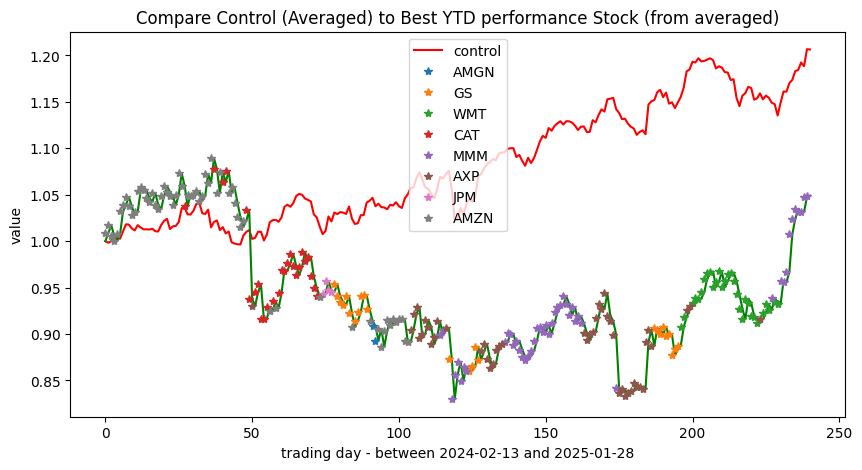

In [43]:
visualize.control_max_YTD_daily(df=df_p, p_cfg=p_cfg, stocks=stocks)